# Retroalimentacion Segundo Parcial (2017-II)
<hr/>

### Primer Punto
##### 	Sea $P(x)$ el polinomio de Lagrange que interpola los nodos $[(x_0,y_0),(x_1,y_1)]$ y $Q(x)$ el polinomio de Lagrange que interpola los nodos $[(x_2,y_2),(x_3,y_3)]$. Construir un interpolador basado en $P(x)$ y $Q(x)$ que interpole todos los nodos $[(x_0,y_0 ),(x_1,y_1 ),(x_2,y_2 ),(x_3,y_3 )]$ asumiendo que $x_i\neq x_j$ para todo $i \neq j$. Para ello siga los siguientes pasos:
* Deberá crear un script que se llame **PQpol.py** el cual llamará como biblioteca externa al script **lagrange.py** (El cual ya viene incluido en la carpeta de códigos que contiene a este notebook). Recuerde usar el comando:

```
    import <biblioteca> as <abreviación>
```

* Dentro de **PQpol.py** defina los datos a interpolar como dos listas de datos, donde:

\begin{equation}
datos1 = [(x_0,y_0),(x_1,y_1)]=[(-2,-1.5),(-1,-0.5)]
\end{equation}
\begin{equation}
datos2 = [(x_2,y_2),(x_3,y_3)]=[(+1,+2.4),(+2,+2.0)]
\end{equation}

* Construya una función con nombre **H()**, donde los argumentos serán las dos listas de datos y cuya salida sea una función que pueda evaluarse para cualquier $x$, entonces:

```
    def H(datos1,datos2):
        <procesos internos de la función>
        return <polinomio a evaluar para cualquier x>
```

* Cuando ejecute el script **PQpol.py**, verifique que la salida del polinomio resultante en la función **H( )** sea tal que interpola correctamente todos los puntos y por lo tanto que $H(x_i )= y_i$ para $i= 0,1,2,3$.

H(-2) =  -1.5
H(-1) =  -0.5
H(1) =  2.3999999999999995
H(2) =  2.0


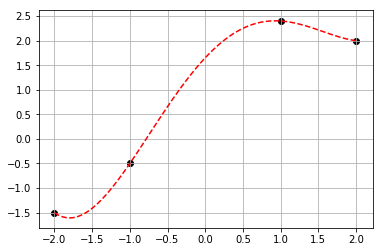

In [13]:
# Solucion que debería estar contenida en el script PQpol.py
import numpy as np
import matplotlib.pyplot as plt
import lagrange as lg
datos1 = [[-2,-1.5],[-1,-0.5]]
datos2 = [[1,2.4],[2,2]]

def H(datos1,datos2):
    P = lg.LagrangePol(datos1)
    Q = lg.LagrangePol(datos2)
    x0 = datos1[0][0]
    x1 = datos1[1][0]
    x2 = datos2[0][0]
    x3 = datos2[1][0]
    alpha = 1.0/((x0-x1)*(x0-x2)*(x0-x3))
    beta  = 1.0/((x1-x0)*(x1-x2)*(x1-x3))
    gamma = 1.0/((x2-x0)*(x2-x1)*(x2-x3))
    delta = 1.0/((x3-x0)*(x3-x1)*(x3-x2))
    def pq(x):
        f = P(x)*(x-x2)*(x-x3)*(alpha*(x-x1)+\
            beta*(x-x0))+\
            Q(x)*(x-x0)*(x-x1)*(gamma*(x-x3)+\
            delta*(x-x2));
        return f
    return pq

pol = H(datos1,datos2)

print('H(-2) = ', pol(-2.0))
print('H(-1) = ', pol(-1.0))
print('H(1) = ', pol(1.0))
print('H(2) = ', pol(2.0))

xx = np.linspace(-2,2,100)
yy = pol(xx)

for p in datos1:
    plt.scatter(p[0],p[1],c='k')
for p in datos2:
    plt.scatter(p[0],p[1],c='k')
plt.plot(xx,yy,'--r')
plt.grid(True)
plt.show()

### Segundo Punto
##### Construya un script llamado *P2.py* que realice las siguientes tareas:

* Definir la lista de datos: 

\begin{equation}
[(-\pi/4,\cos⁡(-\pi/4)),(0,\cos⁡(0)),(\pi/6,\cos⁡(π/6)),(\pi/4,\cos⁡(\pi/4))]
\end{equation}

* Utilizar la función definida en **difdiv.py** para construir el interpolador de Newton y la tabla de diferencias correspondiente.

* Mostrar la tabla de diferencias divididas y un gráfico del polinomio interpolador comparándolo con el de la función $\cos⁡(x)$ en el intervalo $[-\pi/4,\pi/4]$.

[[ 0.70710678  0.          0.          0.        ]
 [ 1.          0.37292323  0.          0.        ]
 [ 0.8660254  -0.25587263 -0.48036465  0.        ]
 [ 0.70710678 -0.60702442 -0.44710035  0.02117671]]


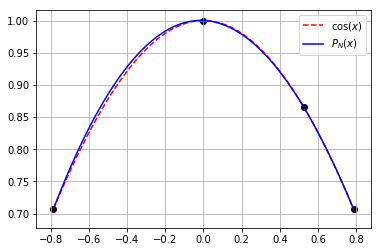

In [32]:
# Solucion que debería estar contenida en el script P2.py
import difdiv as dd
import math as m

datos = [[-m.pi/4,m.cos(-m.pi/4)],[0,m.cos(0)],[m.pi/6,m.cos(m.pi/6)],[m.pi/4,m.cos(m.pi/4)]] 
table, P = dd.NewtonPol(datos)

print(np.array(table))

xx = np.linspace(-m.pi/4,m.pi/4,100)
vf = np.vectorize(m.cos)
yy = vf(xx)
yy2 = P(xx)
for p in datos:
    plt.scatter(p[0],p[1],c='k')
plt.plot(xx,yy,'--r',label=r'$\cos(x)$')
plt.plot(xx,yy2,'b',label =r'$P_N(x)$')
plt.legend()
plt.grid(True)
plt.show()